In [60]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
from sklearn.compose import ColumnTransformer

In [61]:
warnings.filterwarnings('ignore')

### import csv dataframe

In [62]:
df = pd.read_csv('data/raw.csv')
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


### Preparing X and Y

In [63]:
X = df.drop(['math score'],axis = 1)
y = df['math score']
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


### Divide Categorical and Numerical

In [64]:
cat_feature = [feature for feature in X.columns if X[feature].dtypes == 'object']
num_feature = [feature for feature in X.columns if X[feature].dtypes != 'object']

In [65]:
print(cat_feature)
print(num_feature)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
['reading score', 'writing score']


In [66]:
transformer = StandardScaler()
encoder = OneHotEncoder()

In [67]:
preprocessor = ColumnTransformer([
    ('OneHot',encoder,cat_feature),
    ('transformer',transformer,num_feature)
])

In [68]:
X = preprocessor.fit_transform(X)

In [69]:
X.shape

(1001, 19)

### Train Test Data

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [71]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 19), (800,), (201, 19), (201,))

In [72]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [73]:
def evaluate_model(actual,predicted):
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    r2 = r2_score(actual,predicted)
    return mae,mse,r2

In [74]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'ElasticNet':ElasticNet(),
    'neibour':KNeighborsRegressor(),
    'tree': DecisionTreeRegressor(),
    'Random_forest':RandomForestRegressor(),
    'svc':SVC(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'xgb':XGBRegressor(),
    'cat_boost':CatBoostRegressor()
    
}

In [75]:
model_list = []
r2_list = []

In [76]:
for i in range(len(models)):
    model = list(models.values())[i]
    
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mae,train_mse,train_r2 = evaluate_model(y_train,train_pred)
    test_mse,test_mse,test_r2 = evaluate_model(y_test,test_pred)

    print('*'*35)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('-'*35)
    print('Performance of model in training data')
    print(f'mean_squared_error = {train_mse}')
    print(f'mean_absolute_error = {train_mae}')
    print(f'r2_score = {train_r2}')
    print('-'*35)
    print('Performance of model in test data')
    print(f'mean_squared_error = {test_mse}')
    print(f'mean_absolute_error = {train_mae}')
    print(f'r2_score = {test_r2}')
    r2_list.append(test_r2)
    print('*'*35)
    print('\n')



***********************************
LinearRegression
-----------------------------------
Performance of model in training data
mean_squared_error = 28.369296875
mean_absolute_error = 4.2775
r2_score = 0.8719431242076122
-----------------------------------
Performance of model in test data
mean_squared_error = 29.77013370646766
mean_absolute_error = 4.2775
r2_score = 0.8848624964771696
***********************************


***********************************
Ridge
-----------------------------------
Performance of model in training data
mean_squared_error = 28.121081406753543
mean_absolute_error = 4.26760917657927
r2_score = 0.8730635501923323
-----------------------------------
Performance of model in test data
mean_squared_error = 29.49539441330628
mean_absolute_error = 4.26760917657927
r2_score = 0.8859250646418318
***********************************


***********************************
Lasso
-----------------------------------
Performance of model in training data
mean_squared_erro

***********************************
Random_forest
-----------------------------------
Performance of model in training data
mean_squared_error = 5.235704799886621
mean_absolute_error = 1.814825
r2_score = 0.9763664216917717
-----------------------------------
Performance of model in test data
mean_squared_error = 41.23804075456054
mean_absolute_error = 1.814825
r2_score = 0.8405097837494325
***********************************


***********************************
svc
-----------------------------------
Performance of model in training data
mean_squared_error = 60.93875
mean_absolute_error = 5.59125
r2_score = 0.7249270584999872
-----------------------------------
Performance of model in test data
mean_squared_error = 102.07960199004975
mean_absolute_error = 5.59125
r2_score = 0.6052019567790838
***********************************


***********************************
AdaBoostRegressor
-----------------------------------
Performance of model in training data
mean_squared_error = 33.1201

In [77]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model','R2_score']).sort_values(by = ['R2_score'],ascending = False)

,model,R2_score
1,Ridge,0.885925
0,LinearRegression,0.884862
10,cat_boost,0.851858
6,Random_forest,0.840510
2,Lasso,0.828277
8,AdaBoostRegressor,0.824529
9,xgb,0.816889
4,neibour,0.807658
3,ElasticNet,0.754487
5,tree,0.733254


In [87]:
ridge_model = Ridge(fit_intercept=True)
ridge_model.fit(X_train,y_train)
pred = ridge_model.predict(X_test)
score = r2_score(y_test,pred)*100
print(f'Score of model is {score:.2f}')

Score of model is 88.59


### plot y_pred and y_test

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Predicted')

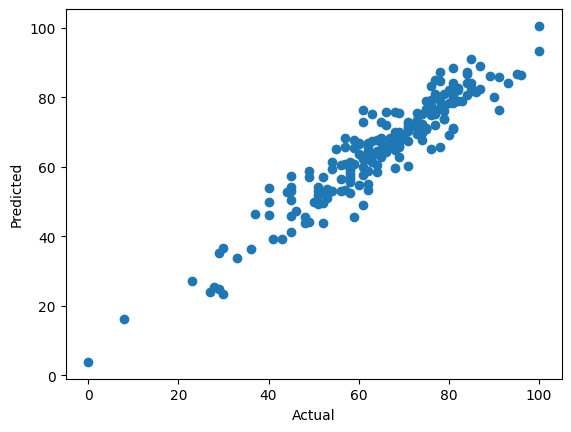

In [90]:
plt.scatter(y_test,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

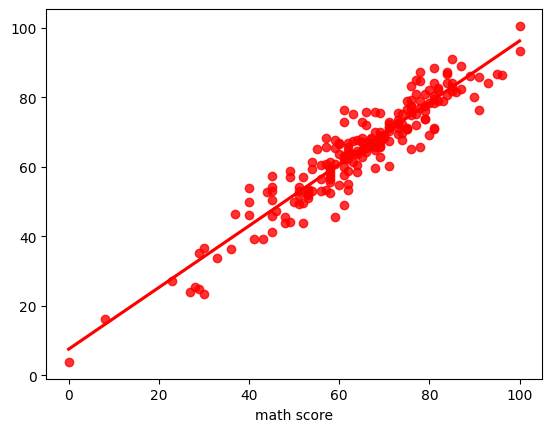

In [97]:
sns.regplot(x = y_test,y = pred,ci = None,color = 'red')  # ci = Confidence Intervel
plt.show()

In [98]:
pd.DataFrame({'Actual':y_test,'Predicted':pred,'Difference':y_test-pred})

,Actual,Predicted,Difference
521,91,76.445225,14.554775
941,78,84.543051,-6.543051
741,37,46.467766,-9.467766
980,8,16.158089,-8.158089
411,84,87.272420,-3.272420
...,...,...,...
332,62,62.326792,-0.326792
208,74,67.597988,6.402012
992,55,65.070059,-10.070059
78,61,62.343460,-1.343460
